This is a notebook which converts the excel Longlist file into Ocelot (https://github.com/ocelot-collab/ocelot) lattice files.


In [1]:
from ocelot.adaptors.longlist2ocelot import *

initializing ocelot...


We need to specify the path where to find the Longlist and where to save the generated python files

In [2]:
folder = "./lattices/longlist_2024_07_04/"

The converter needs to be initialized and the MagneticLattice class of Ocelot defined. We specify the start and end cell position of the portion of the file we are interested in and matching markers. 

In [5]:
# INJECTOR START ********
SC = StructureConverter()
SC.types = ["HKIC", "VKIC", "MONI", "MARK", "INSTR"]
i1_cell = SC.Longlist2Ocelot(folder + 'component_list_2024.07.04.xls', pos_start=3, pos_stop=145, sbend_l_corr=False)
lattice = MagneticLattice(i1_cell)
lattice = merger(lattice, remaining_types=[SBend, RBend, Bend, Monitor, Quadrupole, Undulator, Solenoid, Hcor, Vcor, Sextupole, Cavity, TDCavity],
       remaining_elems=['STSEC.23.I1', 'MATCH.37.I1', "STLAT.47.I1", 'MATCH.52.I1','MATCH.55.I1', 
                        'OTRC.55.I1', 'OTRC.56.I1', 'OTRC.58.I1', 'OTRC.59.I1', 'STSUB.62.I1'], init_energy=0.005)

************** WARNING! Element SOLA.23.I1 was deleted
************** WARNING! Element MIAC.32.I1 was deleted
************** WARNING! Element MIAC.40.I1 was deleted


The initial values of the Twiss functions can be specified when saving the lattice.

In [6]:
tws = Twiss()
tws.E = 0.005
tws.beta_x  = 55.7981
tws.beta_y  = 55.7981
tws.alpha_x = 18.1886
tws.alpha_y = 18.1886
tws.s = 23.2

In [7]:
lattice.save_as_py_file(folder + "i1.py", tws0=tws, power_supply=True)
# INJECTOR END ********

This is the repeated for all the sections of the machine.

In [ ]:
# L1 START ********
SC = StructureConverter()
SC.types = ["HKIC", "VKIC", "MONI", "MARK", "INSTR"]
l1_cell = SC.Longlist2Ocelot(folder + 'component_list_2024.07.04.xls', pos_start=145, pos_stop=579, sbend_l_corr=False)
lattice = MagneticLattice(l1_cell)

lattice = merger(lattice, remaining_types=[SBend, RBend, Bend, Monitor, Quadrupole, Undulator, Solenoid,
                                           Hcor, Vcor, Sextupole, Cavity, TDCavity],
       remaining_elems=['STSUB.62.I1', 'MATCH.73.I1', 'STLAT.73.I1', 'MATCH.104.I1', 'MATCH.174.L1', 'MATCH.202.B1', 
                        'MATCH.207.B1', 'MATCH.218.B1', 'ENSUB.229.B1'], init_energy=0.13)

tws = Twiss()
tws.beta_x  = 2.6096907242276925
tws.beta_y  = 7.150678422205259
tws.alpha_x = 0.22820424990918614
tws.alpha_y = -2.165836718254254
tws.s = 62.089004999999936
tws.E = 0.13
lattice.sequence = lattice.sequence[2:]
lattice.save_as_py_file(folder + "l1.py", tws0=tws, power_supply=True)
# L1 END ********

In [ ]:
# L2 START ********
SC = StructureConverter()
SC.types = ["HKIC", "VKIC", "MONI", "MARK", "INSTR"]
l2_cell = SC.Longlist2Ocelot(folder + 'component_list_2024.07.04.xls', pos_start=579, pos_stop=920, sbend_l_corr=False)

lattice = MagneticLattice(l2_cell)

lattice = merger(lattice, remaining_types=[SBend, RBend, Bend, Monitor, Quadrupole, Undulator, Solenoid,
                                           Hcor, Vcor, Sextupole, Cavity, TDCavity],
       remaining_elems=['ENSUB.229.B1', 'MATCH.414.B2', 'MATCH.428.B2','MATCH.446.B2', 'ENSUB.466.B2'], init_energy=0.7)

tws = Twiss()

tws.beta_x  = 7.865550253394325
tws.beta_y  = 8.698292442670796
tws.alpha_x = -1.0418290882386196
tws.alpha_y = -1.2234476587083056
tws.E = 0.7
tws.s = 229.3007540000002

lattice.sequence = lattice.sequence[2:]
lattice.save_as_py_file(folder + "l2.py", tws0=tws, power_supply=True)
# L2 END ********

In [ ]:
# L3 START ********
SC = StructureConverter()
SC.types = ["HKIC", "VKIC", "MONI", "MARK", "INSTR"]
l3_cell = SC.Longlist2Ocelot(folder + 'component_list_2024.07.04.xls', pos_start=920, pos_stop=2095, sbend_l_corr=False)

lattice = MagneticLattice(l3_cell)

lattice = merger(lattice, remaining_types=[SBend, RBend, Bend, Monitor, Quadrupole, Undulator, Solenoid,
                                           Hcor, Vcor, Sextupole, Cavity, TDCavity],
       remaining_elems=['ENSUB.466.B2','MATCH.525.L3','ENSEC.1652.L3'], init_energy=2.4)

tws = Twiss()
tws.beta_x  = 29.41686175122868
tws.beta_y  = 5.144745537053657
tws.alpha_x = 2.626251558631553
tws.alpha_y = -1.253808202141189
tws.E = 2.4
tws.s = 466.82

lattice.sequence = lattice.sequence[2:]
lattice.save_as_py_file(folder + "l3.py", tws0=tws, power_supply=True)
# L3 END *******************

After the linac sections there is a ~200 m long collimation section.

In [ ]:
# CL START *********************
SC = StructureConverter()
SC.types = ["HKIC", "VKIC", "MONI", "MARK", "INSTR"]
t1_cell = SC.Longlist2Ocelot(folder + 'component_list_2024.07.04.xls', pos_start=2095, pos_stop=2313, sbend_l_corr=False)

lattice = MagneticLattice(t1_cell)

lattice = merger(lattice, remaining_types=[SBend, RBend, Bend, Monitor, Quadrupole, Undulator, Solenoid,
                                           Hcor, Vcor, Sextupole, Cavity, Octupole, TDCavity],
       remaining_elems=['STSEC.1652.CL','ENSEC.1854.CL'], init_energy=14)

tws = Twiss()
tws.beta_x  = 41.66496631816343
tws.beta_y  = 53.55111570484648
tws.alpha_x = -0.9889897612957868
tws.alpha_y = 2.004822139010063
tws.E = 14
tws.s = 1652.902800000028

lattice.sequence = lattice.sequence[2:]
lattice.save_as_py_file(folder + "cl.py", tws0=tws, power_supply=True)
# CL END ***************************

In [ ]:
# TLD START ************************
SC = StructureConverter()
SC.types = ["HKIC", "VKIC", "MONI", "MARK", "INSTR"]
tld_cell = SC.Longlist2Ocelot(folder + 'component_list_2024.07.04.xls', pos_start=4530, pos_stop=4672, sbend_l_corr=False)
# In the longlist Excel file the TLD section is way down the order
lattice = MagneticLattice(tld_cell)

lattice = merger(lattice, remaining_types=[SBend, RBend, Bend, Monitor, Quadrupole, Undulator, Solenoid,
                                           Hcor, Vcor, Sextupole, Cavity, TDCavity],
       remaining_elems=['STSEC.1980.TLD', 'OTRC.1995.TLD','ENSEC.2130.TLD'], init_energy=14)

tws = Twiss()
tws.beta_x  = 43.11647525647555
tws.beta_y  = 10.860573729512675
tws.alpha_x = -2.1790120506947406
tws.alpha_y = 0.6184659724795544
tws.E = 14
tws.s = 1980.3864730000207

lattice.sequence = lattice.sequence[2:]
lattice.save_as_py_file(folder + "tld.py", tws0=tws, power_supply=True)
# TLD END ***************************

We completed one line. We can now check the optics functions by reading the Longlist Twiss parameters and crosschecking with the ones calculated using Ocelot.

In [31]:
import sys
sys.path.insert(1, folder)

import matplotlib.pyplot as plt
import pandas as pd
from ocelot import *
from ocelot.gui import *
import i1, l1, l2, l3, cl, tl2_tld, tld

First we calculate the twiss functions with Ocelot. We need the complete lattice, adding up the various sections making it up. The Twiss parameters are calculated from the initial ones at the first section composing the lattice.

In [12]:
lat = MagneticLattice(i1.cell + l1.cell + l2.cell + l3.cell + cl.cell + tl2_tld.cell + tld.cell)
tws = twiss(lat, i1.tws0)

Let's now read the parameters (calculated with MAD8) from the Longlist excel file.

In [14]:
file_path = folder + "component_list_2024.07.04.xls"
sheet_name = "LONGLIST"  
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# I1
df_i1 = df[df["SECTION"] == "I1"]
df_i1 = df_i1[df_i1["SUBSECTION"] != "G1D"]
# L1
df_l1 = df[df["SECTION"] == "L1"]
# B1
df_b1 = df[df["SECTION"] == "B1"]
# L2
df_l2 = df[df["SECTION"] == "L2"]
# B2
df_b2 = df[df["SECTION"] == "B2"]
# L3
df_l3 = df[df["SECTION"] == "L3"]
# CL
df_cl = df[df["SECTION"] == "CL"]
# TL1 and TL2
df_tl = df[df["SECTION"] == "TL"]
df_tl = df_tl[df_tl["SUBSECTION"] != "TL3"]
df_tl = df_tl[df_tl["SUBSECTION"] != "TL4"]
df_tl = df_tl[df_tl["SUBSECTION"] != "TL5"]
# TLD
df_tld = df[df["SECTION"] == "TLD"]

Then we concatenate all the sections and read the relevant information (the position along the machine needs to be corrected by 23.2 meters).

In [15]:
# concatenate sections
s = np.concatenate((df_i1["S"].to_numpy() , df_l1["S"].to_numpy(),df_b1["S"].to_numpy(),  df_l2["S"].to_numpy(), 
                    df_b2["S"].to_numpy(), df_l3["S"].to_numpy(), df_cl["S"].to_numpy(), df_tl["S"].to_numpy(), df_tld["S"].to_numpy()))+23.2
beta_x = np.concatenate((df_i1["BETX"].to_numpy() , df_l1["BETX"].to_numpy(),df_b1["BETX"].to_numpy(),  df_l2["BETX"].to_numpy(), 
                         df_b2["BETX"].to_numpy(), df_l3["BETX"].to_numpy(), df_cl["BETX"].to_numpy(), df_tl["BETX"].to_numpy(), df_tld["BETX"].to_numpy()))
beta_y = np.concatenate((df_i1["BETY"].to_numpy() , df_l1["BETY"].to_numpy(),df_b1["BETY"].to_numpy(),  df_l2["BETY"].to_numpy(), 
                         df_b2["BETY"].to_numpy(), df_l3["BETY"].to_numpy(), df_cl["BETY"].to_numpy(), df_tl["BETY"].to_numpy(), df_tld["BETY"].to_numpy()))
D_x = np.concatenate((df_i1["DX"].to_numpy(), df_l1["DX"].to_numpy(), df_b1["DX"].to_numpy(), df_l2["DX"].to_numpy(), df_b2["DX"].to_numpy(), 
                      df_l3["DX"].to_numpy(), df_cl["DX"].to_numpy(), df_tl["DX"].to_numpy(), df_tld["DX"].to_numpy()))
D_y = np.concatenate((df_i1["DY"].to_numpy(), df_l1["DY"].to_numpy(), df_b1["DY"].to_numpy(), df_l2["DY"].to_numpy(), df_b2["DY"].to_numpy(), 
                      df_l3["DY"].to_numpy(), df_cl["DY"].to_numpy(), df_tl["DY"].to_numpy(), df_tld["DY"].to_numpy()))

Let's plot the values from MAD8 and Ocelot and see if they agree.

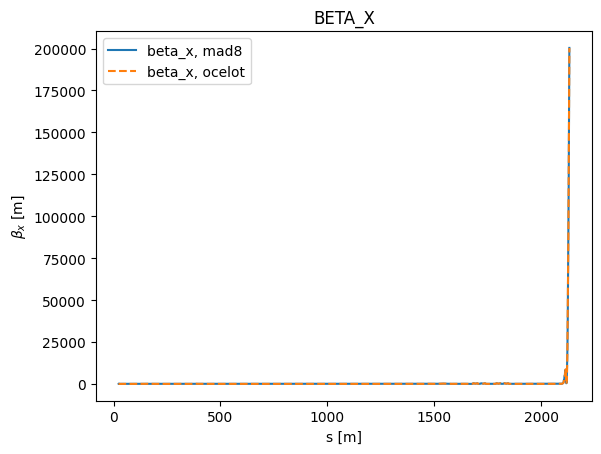

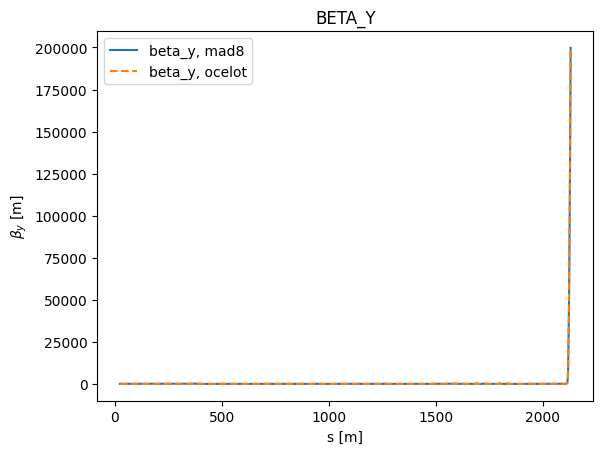

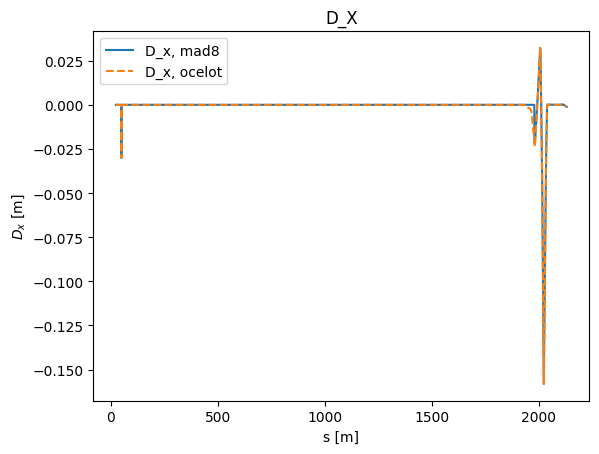

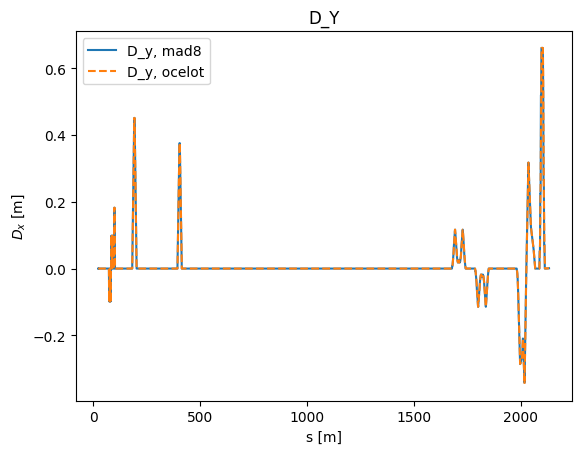

In [32]:
plt.figure(1)
plt.title("BETA_X")
plt.plot(s, beta_x, label="beta_x, mad8")
s_ocl = [tw.s for tw in tws]
beta_x_ocl = [tw.beta_x for tw in tws]
beta_y_ocl = [tw.beta_y for tw in tws]
plt.plot(s_ocl, beta_x_ocl, "--", label="beta_x, ocelot")
plt.ylabel(r"$\beta_x$ [m]")
plt.xlabel("s [m]")
plt.legend()

plt.figure(2)
plt.title("BETA_Y")
plt.plot(s, beta_y, label="beta_y, mad8")
plt.plot(s_ocl, beta_y_ocl, "--", label="beta_y, ocelot")
plt.xlabel("s [m]")
plt.ylabel(r"$\beta_y$ [m]")
plt.legend()

d_x_ocl = [tw.Dx for tw in tws]
d_y_ocl = [tw.Dy for tw in tws]

plt.figure(3)
plt.title("D_X")
plt.plot(s, D_x, label="D_x, mad8")
plt.plot(s_ocl, d_x_ocl, "--", label="D_x, ocelot")
plt.xlabel("s [m]")
plt.ylabel(r"$D_x$ [m]")
plt.legend()

plt.figure(4)
plt.title("D_Y")
plt.plot(s, D_y, label="D_y, mad8")
plt.plot(s_ocl, d_y_ocl, "--", label="D_y, ocelot")
plt.xlabel("s [m]")
plt.ylabel(r"$D_x$ [m]")
plt.legend()

plt.show()